Q. 12.

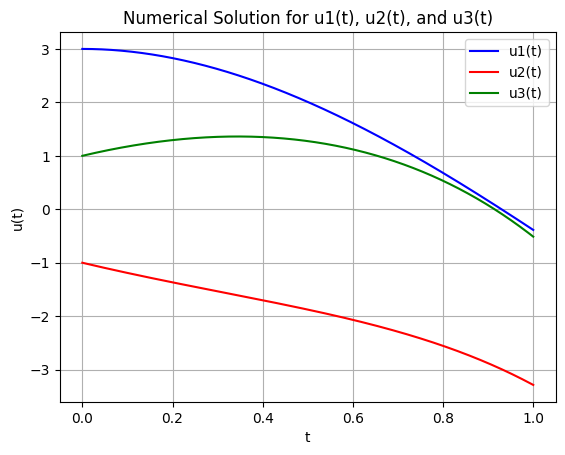

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of first-order ODEs
def f(t, u):
    u1, u2, u3 = u
    du1dt = u1 + 2*u2 - 2*u3 + np.exp(-t)
    du2dt = u2 + u3 - 2*np.exp(-t)
    du3dt = u1 + 2*u2 + np.exp(-t)
    return [du1dt, du2dt, du3dt]

# Implement the fourth-order Runge-Kutta method
def rk4(f, t_span, u0, h):
    t_values = np.arange(t_span[0], t_span[1] + h, h)
    n = len(t_values)
    u = np.zeros((len(u0), n))
    u[:,0] = u0
    for i in range(1, n):
        k1 = np.array(f(t_values[i-1], u[:,i-1]))
        k2 = np.array(f(t_values[i-1] + 0.5*h, u[:,i-1] + 0.5*h*k1))
        k3 = np.array(f(t_values[i-1] + 0.5*h, u[:,i-1] + 0.5*h*k2))
        k4 = np.array(f(t_values[i-1] + h, u[:,i-1] + h*k3))
        u[:,i] = u[:,i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t_values, u

# Define initial conditions and time span
u0 = [3, -1, 1]
t_span = [0, 1]
h = 0.0001  # Step size

# Solve the ODEs using the fourth-order Runge-Kutta method
t_values, u_values = rk4(f, t_span, u0, h)

# Plot the numerical solution
plt.plot(t_values, u_values[0], label='u1(t)', color='blue')
plt.plot(t_values, u_values[1], label='u2(t)', color='red')
plt.plot(t_values, u_values[2], label='u3(t)', color='green')

plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Numerical Solution for u1(t), u2(t), and u3(t)')
plt.legend()
plt.grid(True)
plt.show()
